# Stock Price Prediction using ARIMA

This project aims to predict the stock price of **Tesla (TSLA)** using the **AutoRegressive Integrated Moving Average (ARIMA)** model, a statistical model for time-series forecasting.

## Features
- **Data Download**: Downloads historical stock data for Tesla from Yahoo Finance (yfinance).
- **Data Preprocessing**: Cleans the data and prepares it for training.
- **Model Training**: Trains the ARIMA model using the cleaned data.
- **Prediction and Forecasting**: Predicts future Tesla stock prices based on the trained ARIMA model.
- **Visualization**: Visualizes the actual vs predicted stock prices and forecasts for the next week.

## Requirements

To run this project, you will need the following Python packages:

- `yfinance` - For downloading stock data from Yahoo Finance.
- `numpy` - For numerical operations.
- `pandas` - For data manipulation and analysis.
- `matplotlib` - For plotting graphs.
- `statsmodels` - For ARIMA model training.
- `seaborn` (optional) - For enhanced plotting styles.

You can install all dependencies by running:

```bash
pip install -r requirements.txt
```

## Usage
1. **Clone the Repository:**
```bash
git clone https://github.com/Poulami-Nandi/Stock_Prediction_ARIMA.git
cd Stock_Prediction_ARIMA
```
2. **Download and Preprocess Data:**
In the StockPrediction_ARIMA.ipynb, we download the historical stock data of Tesla for the last 5 years and clean the data by handling missing values and formatting the columns.

3. **Train the ARIMA Model:**
In train_arima_model.py, we train the ARIMA model on the stock data. The script downloads the data, processes it, and trains the ARIMA model to make predictions.
```bash
python train_arima_model.py
```

4. **Make Predictions:**
Once the ARIMA model is trained, you can use predict_stock_price.py to generate predictions for Tesla stock prices and compare them with actual values.
```bash
python predict_stock_price.py
```

5. **Visualize the Results:**
The notebook visualization.ipynb provides various visualizations:
* **Actual vs Predicted:** Comparing the actual stock price with the predicted values from ARIMA.
* **Forecasting:** Plotting the forecasted stock prices for the next week.
```bash
jupyter notebook visualization.ipynb
```
## Example Output
* **Predicted vs Actual Stock Prices:** A plot showing how well the ARIMA model predicted Tesla's stock price.
* **Stock Price Forecast:** Forecast of Tesla's stock price for the upcoming week.

## Directory Structure
```bash
Stock_Prediction_ARIMA/
│
├── data/                         # Contains raw and processed data
│   ├── tesla_stock_data_5y.csv   # Raw data of Tesla stock (from Yahoo Finance) for last 5 years
│   ├── tesla_stock_data_6m.csv   # Raw data of Tesla stock (from Yahoo Finance) for last 6 months
|   ├── tesla_next_week_pred.csv  # Prediction for next week
│
├── notebooks/                       # Jupyter notebooks for analysis and visualization
│   ├── StockPrediction_ARIMA.ipynb  # Data preprocessing and cleaning
│   ├── visualization.ipynb          # Visualizations of predicted and actual stock prices
│
├── scripts/                          # Python scripts for model training and prediction
│   ├── StockPrediction_ARIMA.py      # Script to train ARIMA model
│
├── requirements.txt              # List of required Python packages
├── README.md                     # Project overview and instructions
```

## License
This project is licensed under the MIT License - see the LICENSE file for details.

In [156]:
#@title Import necessary modules
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import yfinance as yf

In [157]:
#@title Download historical stock Data of Tesla for last 5 years
import yfinance as yf

# Download historical data for Tesla (TSLA) for the last 5 years
tesla_data = yf.download('TSLA', period="5y", interval="1d")
tesla_data.to_csv('tesla_stock_data_5y.csv')

[*********************100%***********************]  1 of 1 completed


In [140]:
tesla_data.head()

Price,Close,High,Low,Open,Volume
Ticker,TSLA,TSLA,TSLA,TSLA,TSLA
Date,,,,,
2020-02-03,52.000000,52.409332,44.901333,44.912666,705975000
2020-02-04,59.137333,64.599335,55.591999,58.863998,914082000
2020-02-05,48.980000,56.398666,46.940666,54.883999,726357000
2020-02-06,49.930668,53.055332,45.799999,46.661331,598212000
2020-02-07,49.871334,51.316666,48.666668,48.703335,255952500


In [158]:
#@title Download historical stock Data of Tesla for last 6 months
import yfinance as yf

# Download historical data for Tesla (TSLA) for the last 6 months
tesla_data = yf.download('TSLA', period="6mo", interval="1d")
tesla_data.to_csv('tesla_stock_data_6m.csv')

[*********************100%***********************]  1 of 1 completed


[*********************100%***********************]  1 of 1 completed


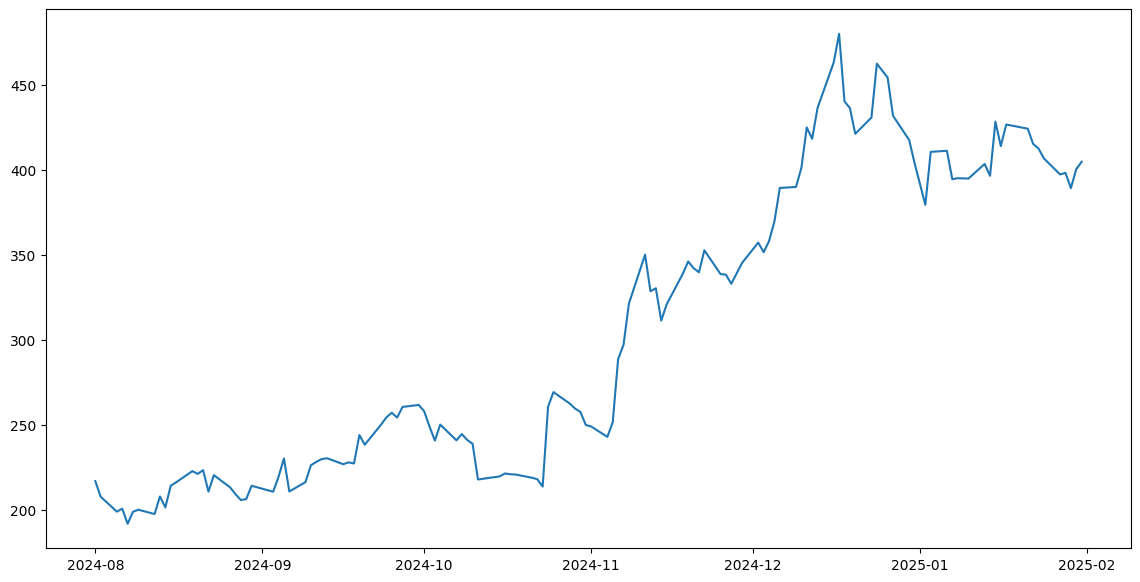

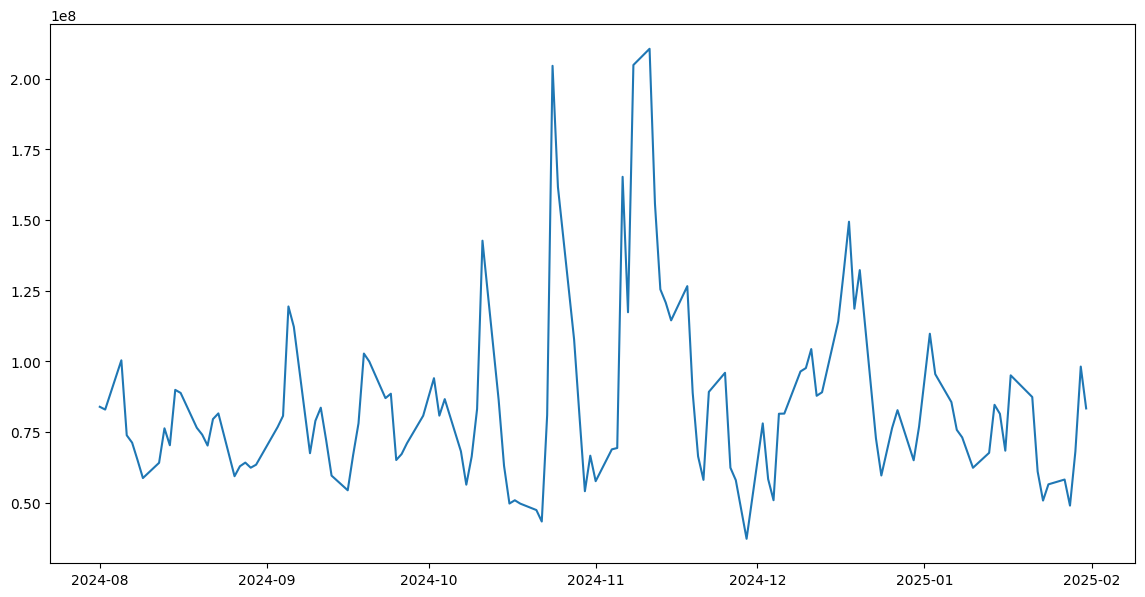

In [159]:
#@title Plot Daily Stock Price and Volume for last 6 months
import yfinance as yf
import pandas as pd

tickerStrings = ['TSLA']
df_list = []
for ticker in tickerStrings:
    data = yf.download(ticker, group_by="Ticker", period='6mo', interval='1d')
    df_list.append(data)

# Combine all dataframes into a single dataframe
df = pd.concat(df_list)
df.head()
df['TSLA'].head()
#for i in df.columns:
#  print(i)
df.columns = df.columns.get_level_values(1)
#df.info()
fig, ax = plt.subplots(figsize=(14, 7))  # Get the figure and axes objects
ax.plot(df.index, df['Close'], label='Tesla Daily Stock Price for last 6 months')
fig, ax = plt.subplots(figsize=(14, 7))  # Get the figure and axes objects
ax.plot(df.index, df['Volume'], label='Tesla Daily Stock Price for last 6 months')

[*********************100%***********************]  1 of 1 completed


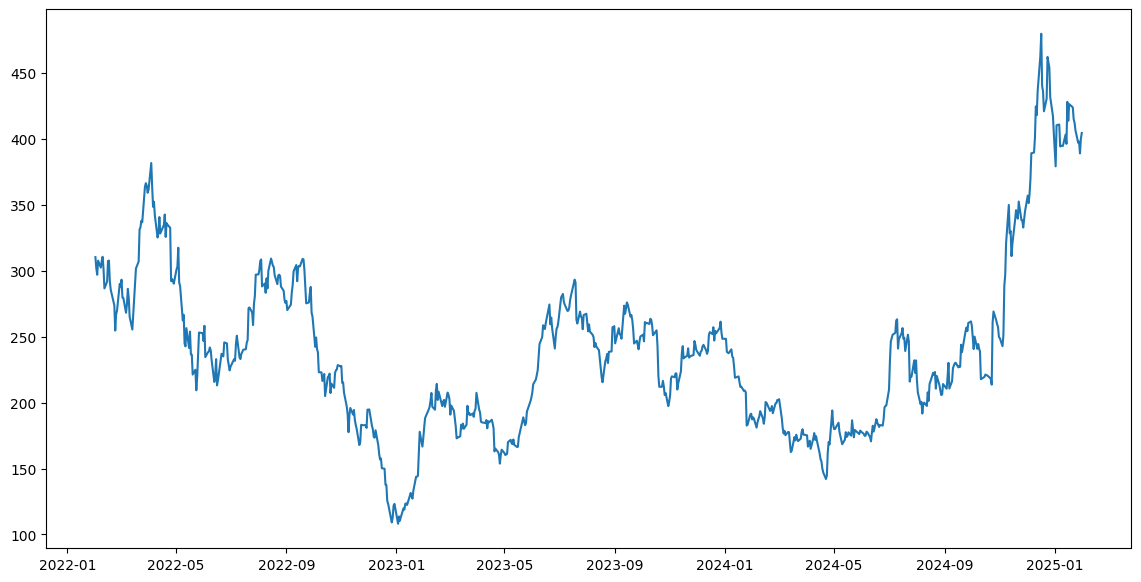

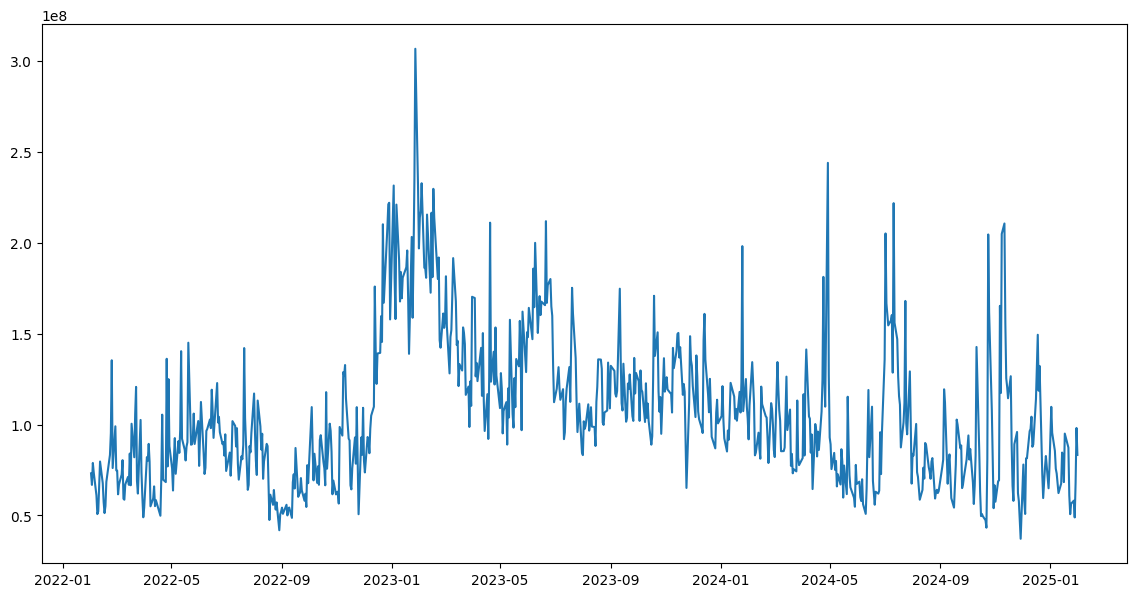

In [160]:
#@title Plot Daily Stock Price and Volume for last 3 years
import yfinance as yf
import pandas as pd

tickerStrings = ['TSLA']
df_list = []
for ticker in tickerStrings:
    data = yf.download(ticker, group_by="Ticker", period='36mo', interval='1d')
    df_list.append(data)

# Combine all dataframes into a single dataframe
df = pd.concat(df_list)
df.head()
df['TSLA'].head()
#for i in df.columns:
#  print(i)
df.columns = df.columns.get_level_values(1)
#df.info()
fig, ax = plt.subplots(figsize=(14, 7))  # Get the figure and axes objects
ax.plot(df.index, df['Close'], label='Tesla Daily Stock Price for last 6 months')
fig, ax = plt.subplots(figsize=(14, 7))  # Get the figure and axes objects
ax.plot(df.index, df['Volume'], label='Tesla Daily Stock Price for last 6 months')

[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


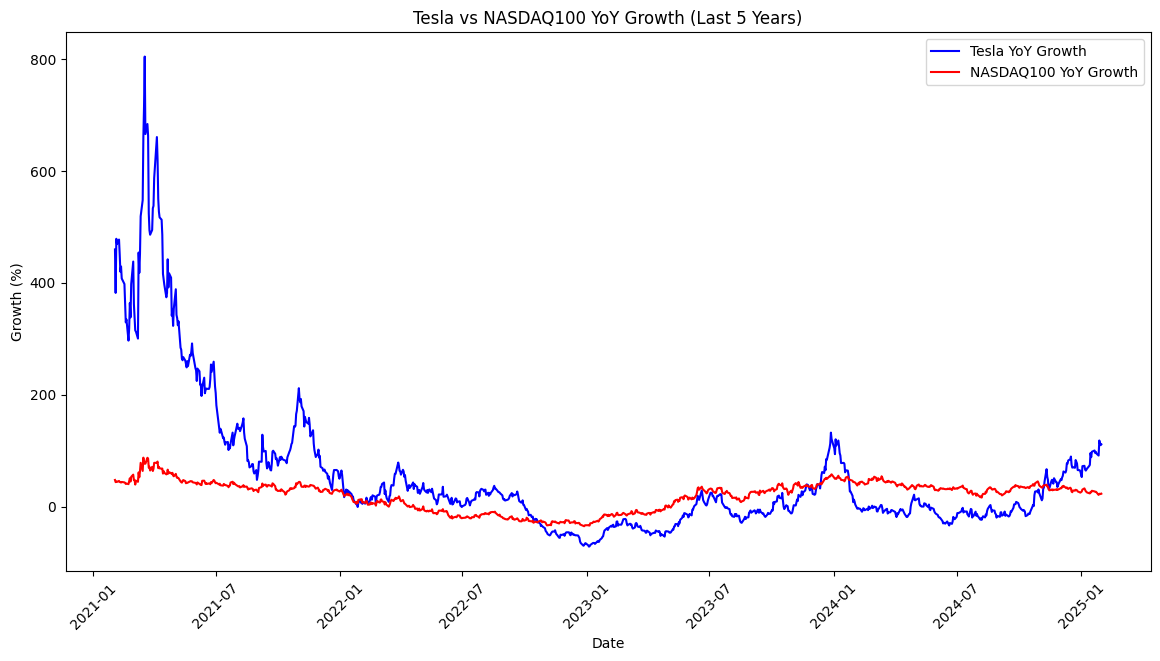

In [161]:
#@title YoY Growth for Tesla vs NASDAQ100
import numpy as np

# Download NASDAQ100 data for comparison
nasdaq_data = yf.download('^NDX', period="5y", interval="1d")
tesla_data = yf.download('TSLA', period="5y", interval="1d")
tesla_data.columns = tesla_data.columns.get_level_values(0)
nasdaq_data.columns = nasdaq_data.columns.get_level_values(0)

# Calculate YoY growth
tesla_data['YoY Growth'] = tesla_data['Close'].pct_change(252) * 100  # 252 trading days in a year
nasdaq_data['YoY Growth'] = nasdaq_data['Close'].pct_change(252) * 100

# Plot YoY growth comparison
plt.figure(figsize=(14, 7))
plt.plot(tesla_data.index, tesla_data['YoY Growth'], label='Tesla YoY Growth', color='blue')
plt.plot(nasdaq_data.index, nasdaq_data['YoY Growth'], label='NASDAQ100 YoY Growth', color='red')
plt.xlabel('Date')
plt.ylabel('Growth (%)')
plt.title('Tesla vs NASDAQ100 YoY Growth (Last 5 Years)')
plt.xticks(rotation=45)
plt.legend()
plt.show()


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


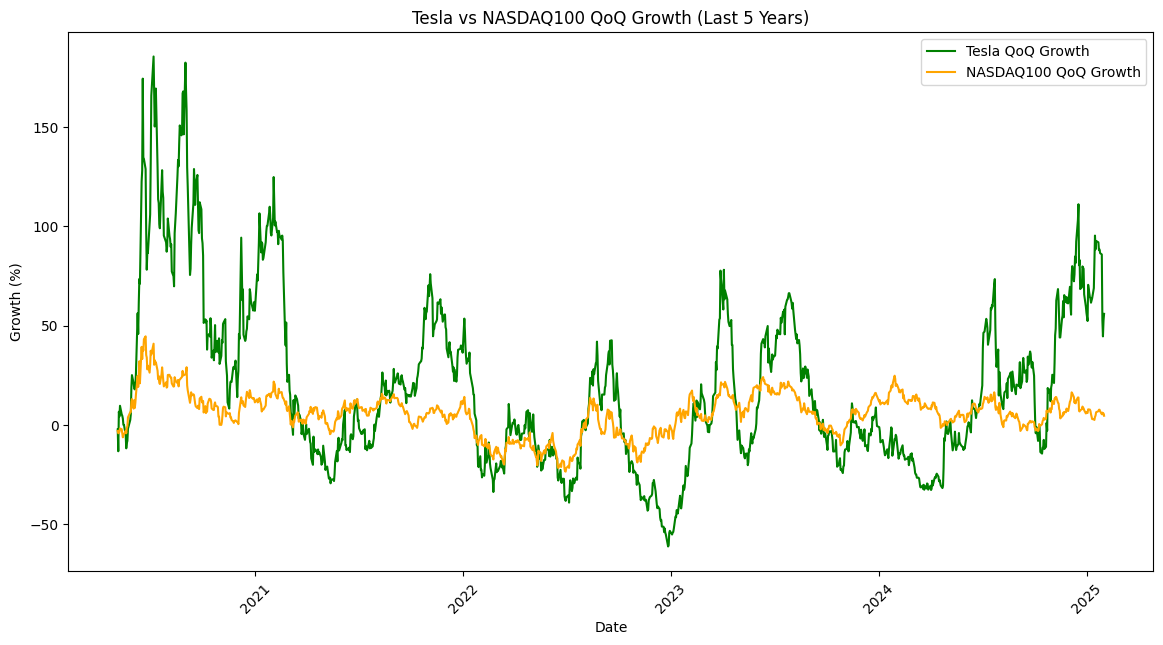

In [162]:
#@title QoQ Growth for Tesla vs NASDAQ100
import numpy as np

# Download NASDAQ100 data for comparison
nasdaq_data = yf.download('^NDX', period="5y", interval="1d")
tesla_data = yf.download('TSLA', period="5y", interval="1d")
tesla_data.columns = tesla_data.columns.get_level_values(0)
nasdaq_data.columns = nasdaq_data.columns.get_level_values(0)
# Calculate QoQ growth
tesla_data['QoQ Growth'] = tesla_data['Close'].pct_change(63) * 100  # ~63 trading days per quarter
nasdaq_data['QoQ Growth'] = nasdaq_data['Close'].pct_change(63) * 100

# Plot QoQ growth comparison
plt.figure(figsize=(14, 7))
plt.plot(tesla_data.index, tesla_data['QoQ Growth'], label='Tesla QoQ Growth', color='green')
plt.plot(nasdaq_data.index, nasdaq_data['QoQ Growth'], label='NASDAQ100 QoQ Growth', color='orange')
plt.xlabel('Date')
plt.ylabel('Growth (%)')
plt.title('Tesla vs NASDAQ100 QoQ Growth (Last 5 Years)')
plt.xticks(rotation=45)
plt.legend()
plt.show()

In [163]:
tesla_data.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1257 entries, 2020-02-03 to 2025-01-31
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Close       1257 non-null   float64
 1   High        1257 non-null   float64
 2   Low         1257 non-null   float64
 3   Open        1257 non-null   float64
 4   Volume      1257 non-null   int64  
 5   QoQ Growth  1194 non-null   float64
dtypes: float64(5), int64(1)
memory usage: 68.7 KB


In [164]:
# Download data
nasdaq_data = yf.download('^NDX', period="5y", interval="1d")
tesla_data = yf.download('TSLA', period="5y", interval="1d")
tesla_data.columns = tesla_data.columns.get_level_values(0)
nasdaq_data.columns = nasdaq_data.columns.get_level_values(0)

# --- Handle Missing Values ---
# Drop rows with any missing values in 'Close' column:
tesla_data.dropna(subset=['Close'], inplace=True)
# ARIMA model
arima_model = ARIMA(tesla_data['Close'], order=(5,1,0))  # p=5, d=1, q=0 (adjust parameters as needed)
arima_fitted = arima_model.fit()


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


In [165]:
#@title verification of ARIMA model
from sklearn.metrics import mean_squared_error
import numpy as np

arima_predictions = arima_fitted.predict(start=train_size, end=len(tesla_data)-1)
arima_rmse = np.sqrt(mean_squared_error(tesla_data['Close'][train_size:], arima_predictions))

print(f"ARIMA RMSE: {arima_rmse}")
print(f"valid_data:  {valid_data}")
print(f"arima_predictions:  {arima_predictions}")



ARIMA RMSE: 15.701762356169016
valid_data:  Price            Close        High         Low        Open    Volume
Date                                                                
2024-10-30  257.549988  263.350006  255.820007  258.040009  53993600
2024-10-31  249.850006  259.750000  249.250000  257.989990  66575300
2024-11-01  248.979996  254.000000  246.630005  252.039993  57544800
2024-11-04  242.839996  248.899994  238.880005  244.559998  68802400
2024-11-05  251.440002  255.279999  246.210007  247.339996  69282500
...                ...         ...         ...         ...       ...
2025-01-27  397.149994  406.690002  389.000000  394.799988  58125500
2025-01-28  398.089996  400.589996  386.500000  396.910004  48910700
2025-01-29  389.100006  398.589996  384.480011  395.209991  68033600
2025-01-30  400.279999  412.500000  384.410004  410.779999  98092900
2025-01-31  404.600006  419.989990  401.339996  401.529999  83283600

[63 rows x 5 columns]
arima_predictions:  Date
2024-10-30 

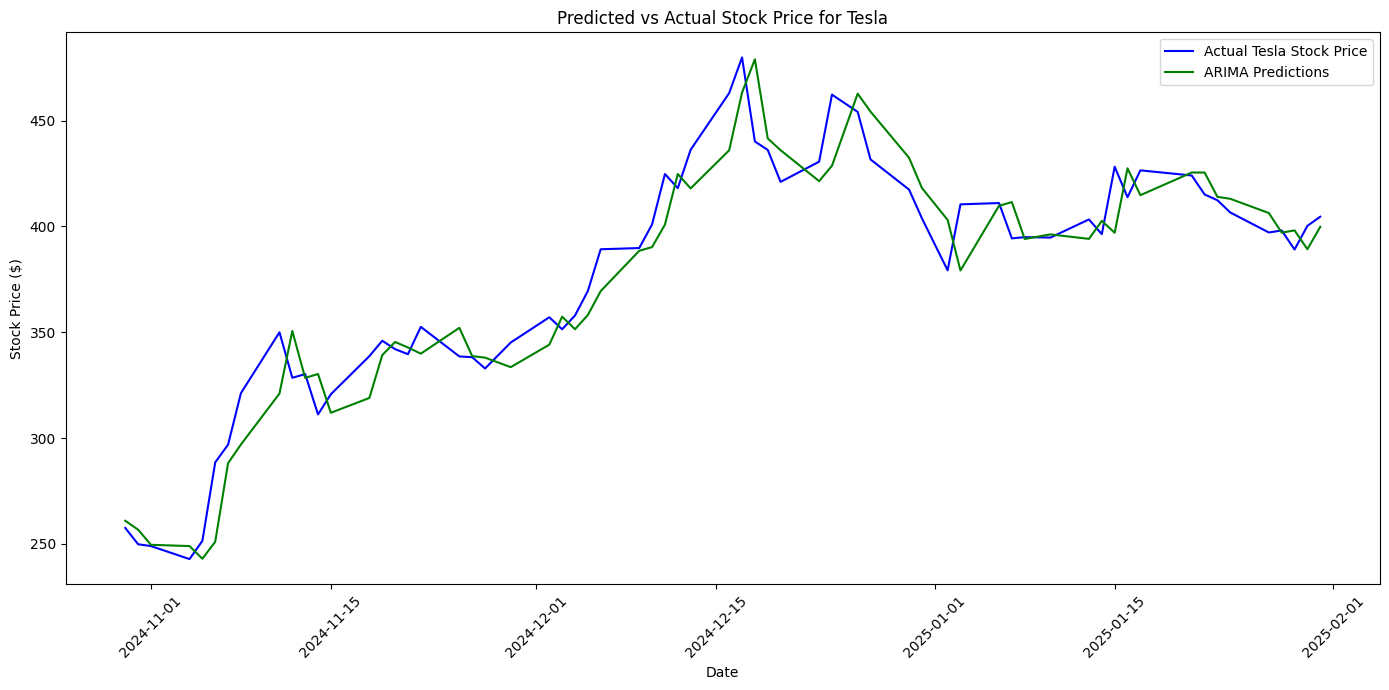

In [166]:
#@title Predicted vs Actual in ARIMA model
import matplotlib.pyplot as plt

# Plotting predicted vs actual
plt.figure(figsize=(14, 7))

# Plot actual Tesla stock price
plt.plot(valid_data.index, valid_data['Close'], label='Actual Tesla Stock Price', color='blue')

# Plot ARIMA predictions (ensure the dates align)
plt.plot(valid_data.index, arima_predictions, label='ARIMA Predictions', color='green')

# If MCMC predictions are used, ensure alignment and uncomment the following line
# plt.plot(valid_data.index, mcmc_predictions, label='MCMC Predictions', color='orange')

# Set labels and title
plt.xlabel('Date')
plt.ylabel('Stock Price ($)')
plt.title('Predicted vs Actual Stock Price for Tesla')

# Add legend
plt.legend()

# Display the plot
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
plt.tight_layout()
plt.show()

In [105]:
model

<Sequential name=sequential_3, built=True>

/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:837: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:837: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(


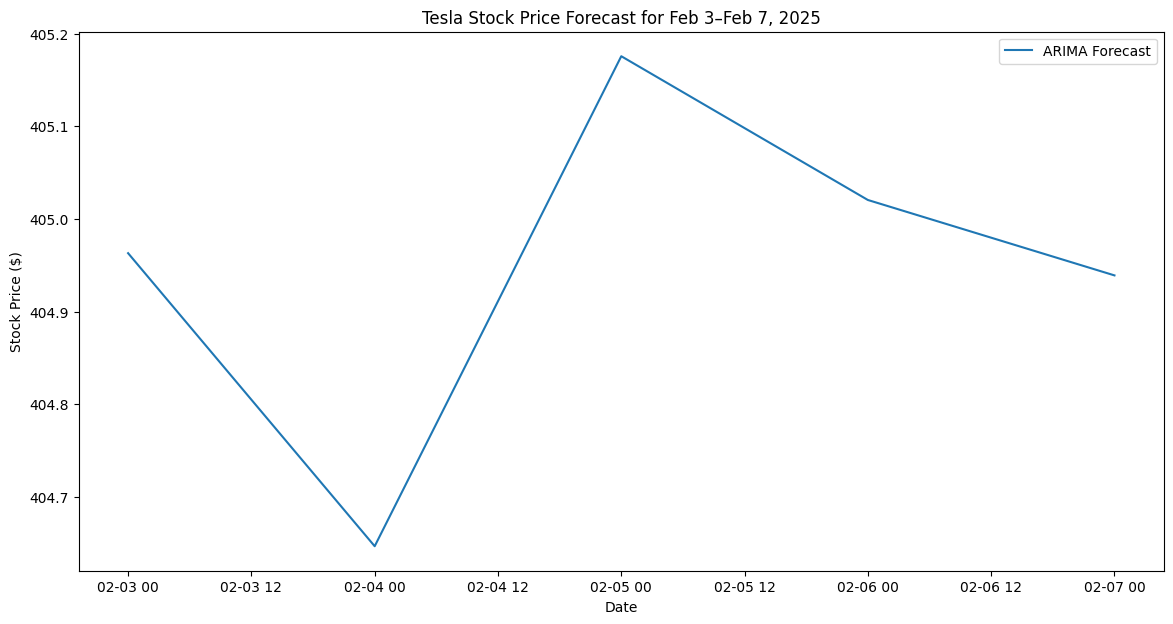

Forcast dates: 
DatetimeIndex(['2025-02-03', '2025-02-04', '2025-02-05', '2025-02-06',
               '2025-02-07'],
              dtype='datetime64[ns]', freq='D')
ARIMA forcast for Feb2-7: 
1257    404.963003
1258    404.646527
1259    405.175705
1260    405.020446
1261    404.939010
Name: predicted_mean, dtype: float64


In [167]:
#@title Forcast for coming week Feb3-7 using ARIMA
# Forecasting for next week using the models
forecast_dates = pd.date_range(start="2025-02-03", end="2025-02-07")

# ARIMA forecast
arima_forecast = arima_fitted.forecast(steps=5)

# MCMC forecast
#mcmc_forecast = np.mean(trace['mu'])

# Plot the forecasts
plt.figure(figsize=(14, 7))
#plt.plot(forecast_dates, lstm_forecast, label='LSTM Forecast')
plt.plot(forecast_dates, arima_forecast, label='ARIMA Forecast')
#plt.plot(forecast_dates, mcmc_forecast, label='MCMC Forecast')
plt.xlabel('Date')
plt.ylabel('Stock Price ($)')
plt.title('Tesla Stock Price Forecast for Feb 3–Feb 7, 2025')
plt.legend()
plt.show()
print(f"Forcast dates: \n{forecast_dates}")
print(f"ARIMA forcast for Feb2-7: \n{arima_forecast}")

In [168]:
#@title Store the next week prediction data
prediction_next_week = pd.DataFrame({'Date': forecast_dates, 'ARIMA_Forecast': arima_forecast})
prediction_next_week.to_csv('tesla_next_week_pred.csv', index=False)
prediction_next_week

,Date,ARIMA_Forecast
1257,2025-02-03,404.963003
1258,2025-02-04,404.646527
1259,2025-02-05,405.175705
1260,2025-02-06,405.020446
1261,2025-02-07,404.939010
